In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Download data from SQL

In [3]:
import sqlite3 # library for working with sqlite database
conn = sqlite3.connect("./data/MIMIC.db") # Create a connection to the on-disk database

In [4]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,CHARTEVENTS,CHARTEVENTS,2,"CREATE TABLE CHARTEVENTS(\n ""ROW_ID"" TEXT,\n ..."
1,table,PROCEDUREEVENTS_MV,PROCEDUREEVENTS_MV,9120960,"CREATE TABLE ""PROCEDUREEVENTS_MV"" (\n""index"" I..."
2,table,CALLOUT,CALLOUT,9132354,"CREATE TABLE ""CALLOUT"" (\n""index"" INTEGER,\n ..."
3,table,D_CPT,D_CPT,9133903,"CREATE TABLE ""D_CPT"" (\n""index"" INTEGER,\n ""R..."
4,table,D_ITEMS,D_ITEMS,9133909,"CREATE TABLE ""D_ITEMS"" (\n""index"" INTEGER,\n ..."
5,table,CAREGIVERS,CAREGIVERS,9134171,"CREATE TABLE ""CAREGIVERS"" (\n""index"" INTEGER,\..."
6,table,MICROBIOLOGYEVENTS,MICROBIOLOGYEVENTS,9134246,"CREATE TABLE ""MICROBIOLOGYEVENTS"" (\n""index"" I..."
7,table,LABEVENTS,LABEVENTS,9153054,"CREATE TABLE ""LABEVENTS"" (\n""index"" INTEGER,\n..."
8,table,INPUTEVENTS_CV,INPUTEVENTS_CV,9708019,"CREATE TABLE ""INPUTEVENTS_CV"" (\n""index"" INTEG..."
9,table,ADMISSIONS,ADMISSIONS,10291267,"CREATE TABLE ""ADMISSIONS"" (\n""index"" INTEGER,\..."


In [43]:
admissions_df = pd.read_sql("""SELECT *
                            FROM admissions
                            """, conn)

In [6]:
admissions_df.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
3,3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,None,None,INTERIOR MYOCARDIAL INFARCTION,0,1
4,4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [7]:
is_dead = admissions_df['HOSPITAL_EXPIRE_FLAG'] == 1

In [8]:
admissions_dead = admissions_df[is_dead]

### Looks like sepsis pneumonia and hemorrhage have the highest number of deaths

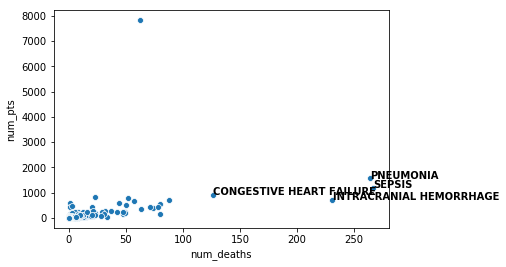

In [17]:
death_by_initial_diagnosis = admissions_df.groupby('DIAGNOSIS')['HOSPITAL_EXPIRE_FLAG'].sum()
num_p_by_initial_diagnosis = admissions_df.groupby('DIAGNOSIS')['HADM_ID'].count()
df = death_by_initial_diagnosis.to_frame(name='num_deaths')
df['num_pts'] = num_p_by_initial_diagnosis
death_vs_pts = sns.scatterplot(x=df['num_deaths'],y=df['num_pts'])
for line in range(0,df.shape[0]):
    if df['num_deaths'][line] > 100:
        death_vs_pts.text(df.num_deaths[line]+0.2, df.num_pts[line], df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

### But this is just from admissions, where the diagnosis is very rough. How about official diagnosis?

In [44]:
diagnosis_icd_df = pd.read_sql("""SELECT *
                            FROM DIAGNOSES_ICD
                            """, conn)

In [45]:
d_icd_df = pd.read_sql("""SELECT *
                            FROM d_icd_diagnoses
                            """, conn)

In [50]:
d_icd_df.shape

(14567, 5)

In [47]:
admissions_diagnosis_icd_df = admissions_df.merge(diagnosis_icd_df,left_on='HADM_ID',right_on='HADM_ID')
admissions_diagnosis_icd_df.shape

(651047, 25)

In [53]:
admissions_df = admissions_diagnosis_icd_df.merge(d_icd_df,on='ICD9_CODE')


In [55]:
death_by_icd_diagnosis = admissions_df.groupby('SHORT_TITLE')['HOSPITAL_EXPIRE_FLAG'].sum()

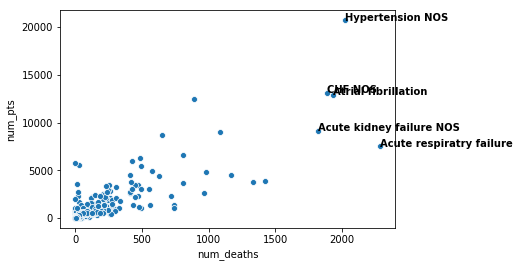

In [57]:
num_p_by_icd_diagnosis = admissions_df.groupby('SHORT_TITLE')['HADM_ID'].count()
df = death_by_icd_diagnosis.to_frame(name='num_deaths')
df['num_pts'] = num_p_by_icd_diagnosis
death_vs_pts = sns.scatterplot(x=df['num_deaths'],y=df['num_pts'])
for line in range(0,df.shape[0]):
    if df['num_deaths'][line] > 1500:
        death_vs_pts.text(df.num_deaths[line]+0.2, df.num_pts[line], df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

### Accute organ failure causes death...hmm kinda obvious, hypertension is probably just too common. 

In [54]:
death_by_icd_diagnosis.sort_values(ascending=False)

SHORT_TITLE
Acute respiratry failure    2282
Hypertension NOS            2023
Atrial fibrillation         1931
CHF NOS                     1884
Acute kidney failure NOS    1820
Severe sepsis               1423
Septicemia NOS              1330
Acidosis                    1167
DMII wo cmp nt st uncntr    1083
Pneumonia, organism NOS      983
Septic shock                 964
Crnry athrscl natve vssl     891
Urin tract infection NOS     811
Food/vomit pneumonitis       809
Encountr palliative care     738
Cardiac arrest               737
Ac kidny fail, tubr necr     715
Hyperlipidemia NEC/NOS       650
Chr airway obstruct NEC      629
Hypothyroidism NOS           574
Do not resusctate status     560
Thrombocytopenia NOS         549
Anemia NOS                   494
Acute necrosis of liver      490
Hyposmolality                490
Esophageal reflux            482
Cardiogenic shock            476
Hyperosmolality              473
Chronic kidney dis NOS       471
Hy kid NOS w cr kid I-IV     44

### Play with chartevents

Start with pulling data just for one patient, let's say patient 24. This code took 10 min to run... and that's just for one patient

In [58]:
chart_pt_24 = pd.read_sql("""SELECT *
                            FROM chartevents
                            WHERE subject_id = 24
                            """, conn)

In [70]:
chart_pt_24.dtypes

ROW_ID          object
SUBJECT_ID      object
HADM_ID         object
ICUSTAY_ID      object
ITEMID          object
CHARTTIME       object
STORETIME       object
CGID            object
VALUE           object
VALUENUM        object
VALUEUOM        object
WARNING         object
ERROR           object
RESULTSTATUS    object
STOPPED         object
dtype: object

In [74]:
chart_pt_24['CHARTTIME'] = pd.to_datetime(chart_pt_24['CHARTTIME'])
chart_pt_24.dtypes

ROW_ID                  object
SUBJECT_ID              object
HADM_ID                 object
ICUSTAY_ID              object
ITEMID                  object
CHARTTIME       datetime64[ns]
STORETIME               object
CGID                    object
VALUE                   object
VALUENUM                object
VALUEUOM                object
WARNING                 object
ERROR                   object
RESULTSTATUS            object
STOPPED                 object
dtype: object

In [73]:
chart_pt_24.sort_values('CHARTTIME')

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,34355425,24,161859,262236,159,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
1,34355426,24,161859,262236,161,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
2,34355427,24,161859,262236,211,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,BPM,,,,NotStopd
3,34355428,24,161859,262236,212,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,,,,,NotStopd
4,34355429,24,161859,262236,618,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,BPM,,,,NotStopd
5,34355430,24,161859,262236,646,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,%,,,,NotStopd
6,34355431,24,161859,262236,742,2139-06-06 13:30:00,2139-06-06 15:46:00,18424,,,kg,,,,NotStopd
188,34355438,24,161859,262236,161,2139-06-06 15:30:00,2139-06-06 15:46:00,18424,None,,,,,,NotStopd
189,34355439,24,161859,262236,184,2139-06-06 15:30:00,2139-06-06 15:48:00,18424,4 Spontaneously,4,,,,,NotStopd
190,34355440,24,161859,262236,198,2139-06-06 15:30:00,2139-06-06 15:48:00,18424,15,15,points,,,,NotStopd


### I looked up several of these codes, not sure how to use most of them. There's a lot of duplicate data, like multiple heart rates all at the same time.

### So I moved on to looking at lab results to see if they make more sense

In [75]:
lab_pt_24 = pd.read_sql("""SELECT *
                            FROM labevents
                            WHERE subject_id = 24
                            """, conn)

In [76]:
lab_pt_24.dtypes

index           int64
ROW_ID          int64
SUBJECT_ID      int64
HADM_ID       float64
ITEMID          int64
CHARTTIME      object
VALUE          object
VALUENUM      float64
VALUEUOM       object
FLAG           object
dtype: object

In [98]:
lab_pt_24['FLAG'].value_counts()

abnormal    13
Name: FLAG, dtype: int64

In [77]:
lab_pt_24['CHARTTIME'] = pd.to_datetime(lab_pt_24['CHARTTIME'])

In [87]:
lab_pt_24_merged = lab_pt_24.merge(itemid_to_var_df,on='ITEMID')

In [94]:
abnormal_items = lab_pt_24_merged['FLAG'] == 'abnormal'

In [95]:
lab_pt_24_merged[abnormal_items][['LEVEL1']]

,LEVEL1
9,NaN
10,Hemoglobin
39,Glucose
41,Glucose
58,Troponin-T
59,Troponin-T
68,Alanine aminotransferase
70,Asparate aminotransferase
80,Mean corpuscular hemoglobin
83,Mean corpuscular hemoglobin concentration


### Here we can see that for patient 24, the lab results above were considered abnormal. We can definitely use this information to predict mortality?

### Lastly, look at microbiology events

In [99]:
micro_pt_24 = pd.read_sql("""SELECT *
                            FROM microbiologyevents
                            WHERE subject_id = 24
                            """, conn)

In [100]:
micro_pt_24.shape

(0, 17)

In [101]:
### this patient doesn't have anything. lets read in the entire df

In [102]:
micro_df = pd.read_sql("""SELECT *
                            FROM microbiologyevents
                            """, conn)

In [103]:
micro_df.shape

(631726, 17)

In [104]:
micro_df.dtypes

index                    int64
ROW_ID                   int64
SUBJECT_ID               int64
HADM_ID                  int64
CHARTDATE               object
CHARTTIME               object
SPEC_ITEMID            float64
SPEC_TYPE_DESC          object
ORG_ITEMID             float64
ORG_NAME                object
ISOLATE_NUM            float64
AB_ITEMID              float64
AB_NAME                 object
DILUTION_TEXT           object
DILUTION_COMPARISON     object
DILUTION_VALUE         float64
INTERPRETATION          object
dtype: object

In [106]:
micro_df.head(50)

,index,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,None,None,None,NaN,None
1,1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,None,NaN,NaN,None,None,None,NaN,None
2,2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,None,NaN,NaN,None,None,None,NaN,None
3,3,747,96,170324,2156-04-20 00:00:00,None,70012.0,BLOOD CULTURE,NaN,None,NaN,NaN,None,None,None,NaN,None
4,4,748,96,170324,2156-04-20 00:00:00,None,70079.0,URINE,NaN,None,NaN,NaN,None,None,None,NaN,None
5,5,749,96,170324,2156-04-21 00:00:00,2156-04-21 14:00:00,70062.0,SPUTUM,NaN,None,NaN,NaN,None,None,None,NaN,None
6,6,750,101,175533,2196-09-26 00:00:00,None,70079.0,URINE,NaN,None,NaN,NaN,None,None,None,NaN,None
7,7,751,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012.0,BLOOD CULTURE,NaN,None,NaN,NaN,None,None,None,NaN,None
8,8,752,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012.0,BLOOD CULTURE,NaN,None,NaN,NaN,None,None,None,NaN,None
9,9,753,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70062.0,SPUTUM,NaN,None,NaN,NaN,None,None,None,NaN,None


not sure if this is helpful

## Resources

In [21]:
itemid_to_var_df = pd.read_csv('./resources/itemid_to_variable_map.csv')

In [ ]:
var_ranges_df = pd.read_csv('./resources/variable_ranges.csv')

In [22]:
itemid_to_var_df.head(20)

,LEVEL2,LEVEL1,ALTERNATIVE,STATUS,STATUS NOTE,ITEMID,MIMIC LABEL,UNITNAME,LINKSTO,COUNT,CATEGORY,CONCEPTID,FLUID,LOINC_CODE,DBSOURCE,Unnamed: 15,PARAM_TYPE,NOTE
0,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,50861,ALANINE AMINOTRANSFERASE (ALT),NaN,labevents,219475,CHEMISTRY,NaN,BLOOD,6/1/1742,NaN,NaN,NaN,NaN
1,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,769,ALT,NaN,chartevents,41594,Enzymes,NaN,NaN,NaN,carevue,NaN,NaN,NaN
2,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,220644,ALT,None,chartevents,37625,Labs,NaN,NaN,NaN,metavision,NaN,Numeric,NaN
3,Albumin,Albumin,NaN,verify,NaN,50862,ALBUMIN,NaN,labevents,146697,CHEMISTRY,NaN,BLOOD,7/1/1751,NaN,NaN,NaN,NaN
4,Albumin,Albumin,NaN,verify,NaN,772,Albumin (>3.2),NaN,chartevents,31022,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN
5,Albumin,Albumin,NaN,verify,NaN,1521,Albumin,NaN,chartevents,24454,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN
6,Albumin,Albumin,NaN,verify,NaN,227456,Albumin,None,chartevents,22945,Labs,NaN,NaN,NaN,metavision,NaN,Numeric with tag,NaN
7,Albumin,Albumin,NaN,verify,NaN,3727,Albumin (3.9-4.8),NaN,chartevents,546,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN
8,Albumin,Albumin (ascites),NaN,verify,NaN,50835,"ALBUMIN, ASCITES",NaN,labevents,1592,CHEMISTRY,NaN,ASCITES,1/1/1749,NaN,NaN,NaN,NaN
9,Albumin,Albumin (body fluid),NaN,verify,NaN,51025,"ALBUMIN, BODY FLUID",NaN,labevents,422,CHEMISTRY,NaN,OTHER BODY FLUID,5/1/1747,NaN,NaN,NaN,NaN


In [59]:
var_ranges_df.head()

NameError: name 'var_ranges_df' is not defined